In [47]:
import cv2
import numpy as np
from pymatting import estimate_alpha_cf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import sys
import os
from alpha_mapping import alpha_map
from scipy.signal import convolve2d
from blur_detection import add_motion_blur, add_circular_blur, get_blur_map, get_blur_map2
from scipy.stats import kurtosis

In [3]:
def imshow_cv2_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

# Gradient

In [7]:
derivative_mask_x = np.array([[-1,0,1]])
derivative_mask_y = np.array([[-1],[0],[1]])

In [14]:
path = "/home/msouda/Datasets/blur_detection_dataset/"

defocused = []
motion = []
for x in np.sort(os.listdir(path)):
    if 'out_of_focus' in x :
        defocused.append(path+x)
    if 'motion' in x:
        motion.append(path+x)

dataset = {'defocused':defocused, 'motion':motion}
colors = ['r', 'g', 'b']

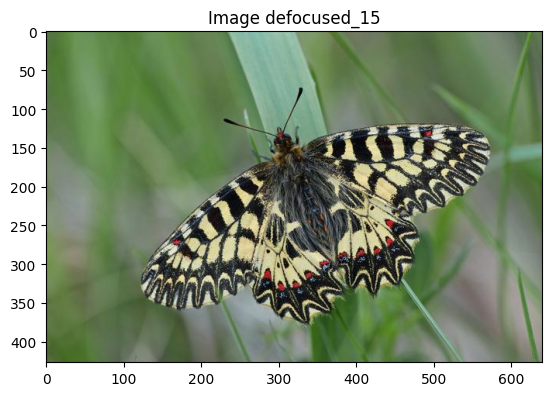

In [17]:
i = 15
type = 'defocused'

l = dataset[type]
file = l[i-1]
img = imread(file)
plt.imshow(img)
plt.title(f'Image {type}_{i}')
plt.show()

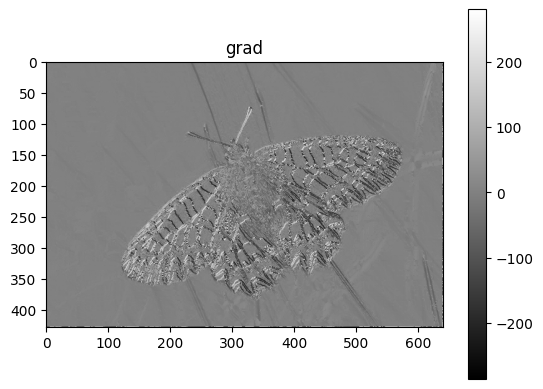

In [44]:
grad = np.zeros((img.shape[0],img.shape[1]))
for i in range(3):
    tmp = img[:,:,i]
    grad_x_p = convolve2d(tmp, derivative_mask_x)[:,1:-1]
    grad_y_p = convolve2d(tmp, derivative_mask_y)[1:-1,:]
    grad_p = np.sign(grad_x_p)*np.sign(grad_y_p)*np.sqrt(np.square(grad_x_p)+np.square(grad_y_p))
    grad = np.where(np.abs(grad) > np.abs(grad_p), grad, grad_p)



plt.imshow(grad, cmap = 'gray')
plt.title('grad')
plt.colorbar()
plt.show()


## Distribution

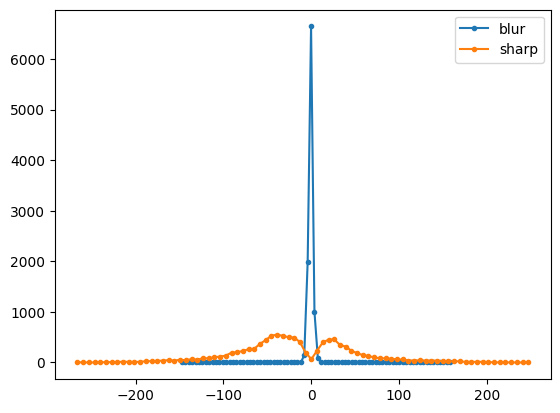

In [46]:
sharp_selec  = grad[200:300,300:400]
blur_selec = grad[:100,:100]
blur_val, blur_bin = np.histogram(blur_selec.flatten(), bins = 80)
sharp_val, sharp_bin = np.histogram(sharp_selec.flatten(), bins = 80)

blur_bin = (blur_bin[:-1] + blur_bin[1:])/2
sharp_bin = (sharp_bin[:-1] + sharp_bin[1:])/2
plt.plot(blur_bin, blur_val, 'o-', label = 'blur', markersize = 3)
plt.plot(sharp_bin, sharp_val, 'o-', label = 'sharp', markersize = 3)
plt.legend()
plt.show()

In [49]:
print(kurtosis(blur_selec.flatten()))
print(kurtosis(sharp_selec.flatten()))

74.98659088837077
0.8188502877465007


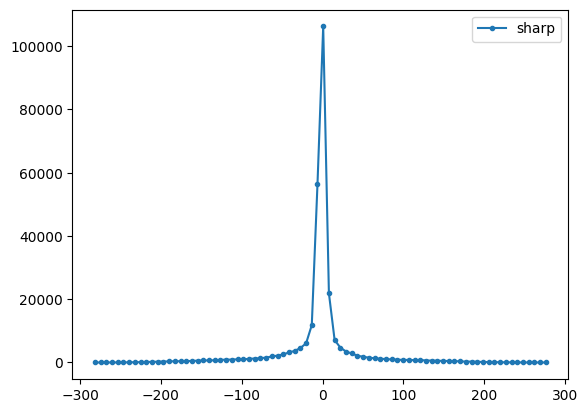

In [50]:
val, bin = np.histogram(grad.flatten(), bins = 80)
bin = (bin[:-1] + bin[1:])/2
plt.plot(bin, val, 'o-', label = 'sharp', markersize = 3)
plt.legend()
plt.show()

In [52]:
print(kurtosis(grad.flatten()))

8.054992510342478


In [53]:
grad.shape

(427, 640)

0


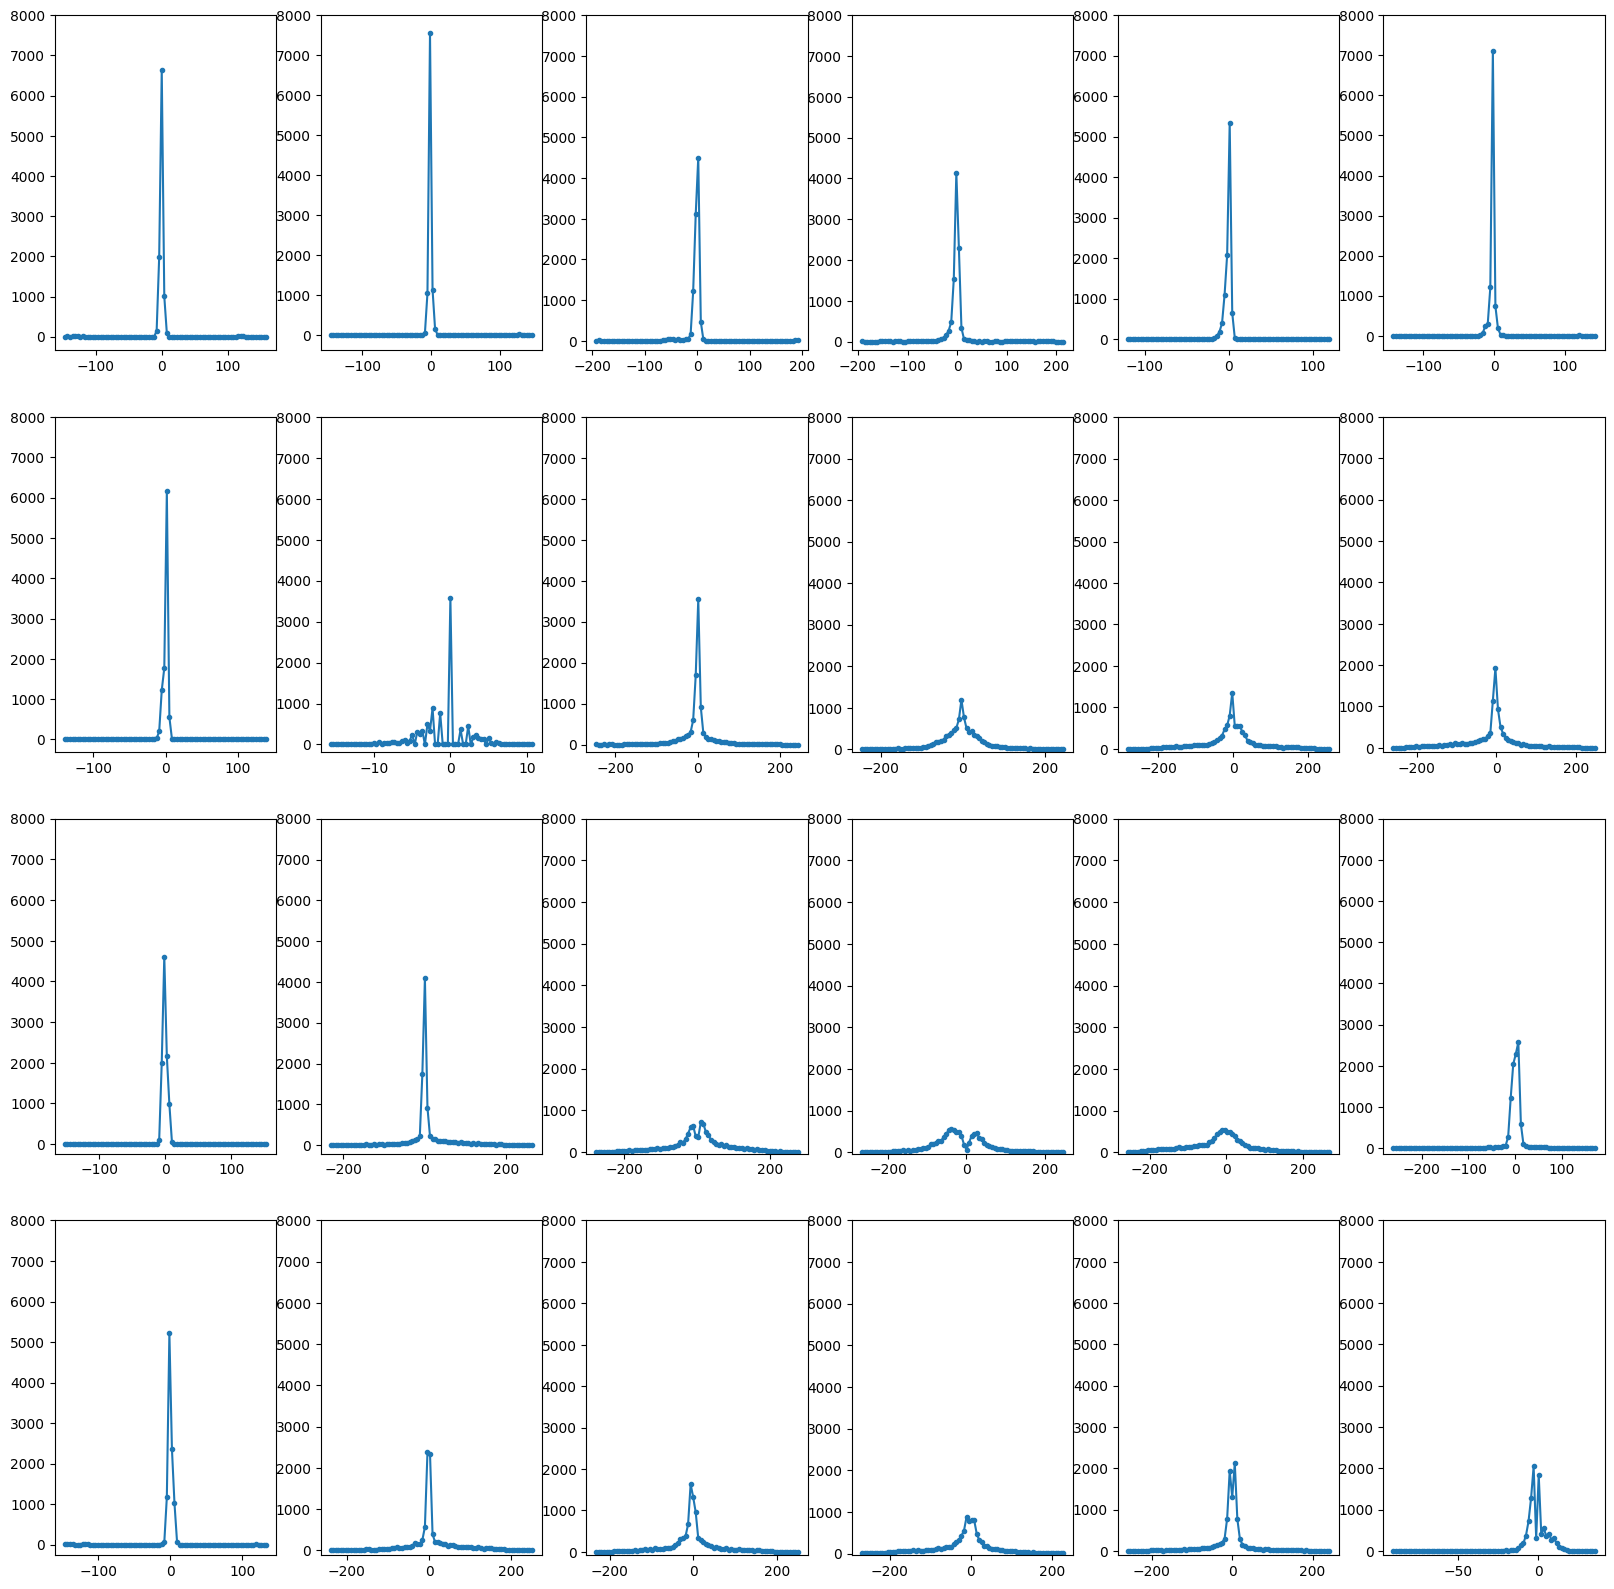

In [68]:
n,p = grad.shape
y_lim = 0
fig, axes = plt.subplots(n//100, p//100, figsize = (20,20))
for i in range(n//100):
    for j in range(p//100):
        tmp = grad[i*100:(i+1)*100, j*100:(j+1)*100]
        val, bin = np.histogram(tmp.flatten(), bins = 80)
        bin = (bin[:-1] + bin[1:])/2
        axes[i,j].plot(bin, val, 'o-', label = 'sharp', markersize = 3)
        axes[i,j].set_ylim(top = 8000)

print(y_lim)

## Kurtosis

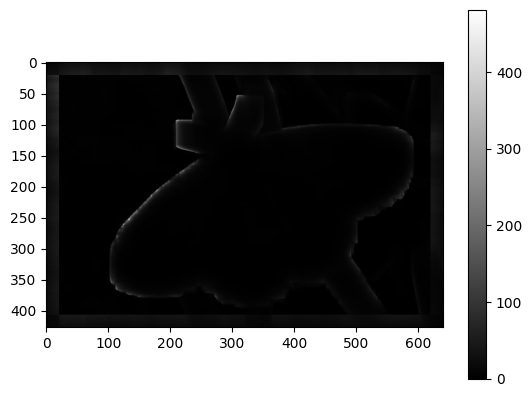

In [71]:
n,p = grad.shape
kurtosis_matrix = np.zeros((n,p))
for i in range(n):
    for j in range(p):
        x_min = max(0, i-20)
        y_min = max(0, j-20)
        x_max = min(n, i+20)
        y_max = min(p, j+20)
        kurtosis_matrix[i,j] = kurtosis(grad[x_min:x_max, y_min:y_max].flatten())

plt.imshow(kurtosis_matrix, cmap='gray')
plt.colorbar()
plt.show()

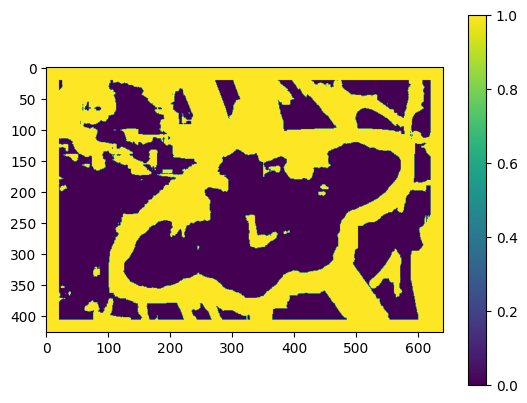

In [76]:
threshold = 1
plt.imshow(kurtosis_matrix>threshold)
plt.colorbar()
plt.show()

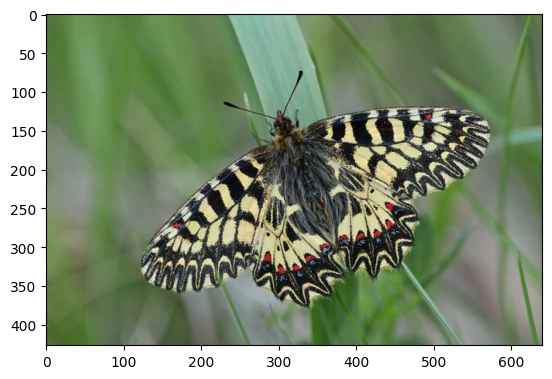

In [70]:
plt.imshow(img)